In [2]:
pip install --upgrade openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   -------------------------------- ------- 204.8/250.9 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\astri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 1200x600 with 0 Axes>

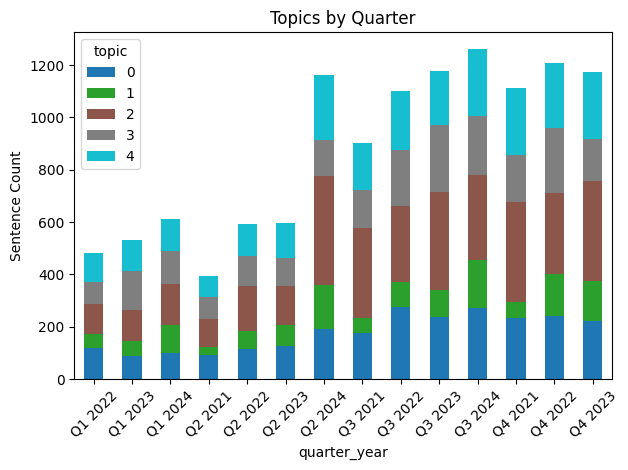

<Figure size 1200x600 with 0 Axes>

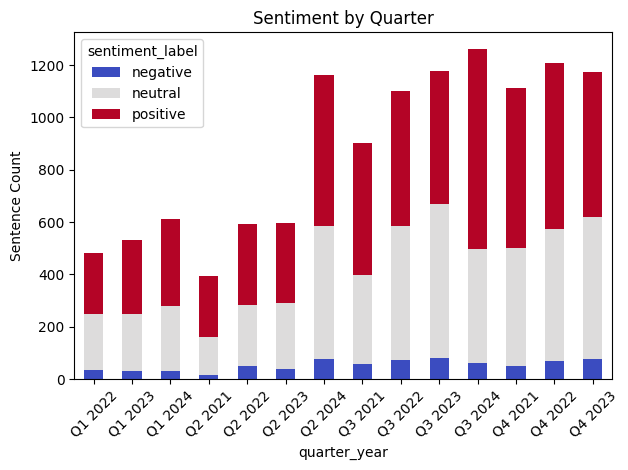

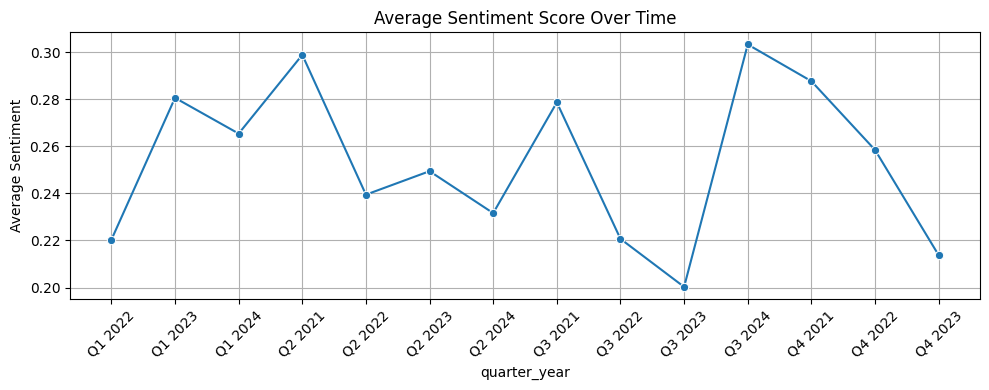

In [4]:

# Bank Earnings Sentiment & Topic Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('vader_lexicon')

# Load sentence-level data
df = pd.read_csv("transcript_sentences.csv")

# --- Sentiment Analysis ---
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['sentence'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.2 else 'negative' if x < -0.2 else 'neutral')

# --- Topic Modeling (LDA) ---
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['sentence'].astype(str))
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X)
df['topic'] = topics.argmax(axis=1)

# --- 1. Topics by Quarter ---
df['quarter_year'] = df['quarter'].astype(str) + " " + df['year'].astype(str)
topic_dist = df.groupby(['quarter_year', 'topic']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
topic_dist.plot(kind='bar', stacked=True, colormap='tab10')
plt.title("Topics by Quarter")
plt.ylabel("Sentence Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Sentiment by Quarter ---
sentiment_dist = df.groupby(['quarter_year', 'sentiment_label']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sentiment_dist.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment by Quarter")
plt.ylabel("Sentence Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Sentiment Score Trend ---
df_grouped = df.groupby(['quarter_year'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_grouped, x='quarter_year', y='sentiment_score', marker='o')
plt.title("Average Sentiment Score Over Time")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
